<h1 style="color:red;">DATA PREPROCESSING </h1>

<h3 style="color:blue;">
    
1. Data Exploration: Explore the data, list down the unique values in each feature.
2. Data Cleaning: Find the missing and inappropriate values, treat them appropriately.
3. Data Analysis: Filter the data with age > 40 and salary < 5000
4. Data Encoding: Convert categorical variables into numerical representations.
5. Feature Scaling: Perform the scaling of the features using StandardScaler and MinMaxScaler. </h3>

<h4  style="color:green;"> Import Libraries and load data</h4>


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
# Load dataset
df = pd.read_csv('employee.csv')
print(df)

     Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]


<h3  style="color:green;"> 1.Data Exploration </h3>


In [26]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [27]:
df.shape

(148, 6)

In [28]:
df.value_counts("Company")


Company
TCS                          53
Infosys                      45
CTS                          36
Congnizant                    2
Infosys Pvt Lmt               2
Tata Consultancy Services     2
Name: count, dtype: int64

In [29]:
## Display the first few rows of the dataset
df.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [30]:
## Display the last few rows of the dataset
df.tail(10)

,Company,Age,Salary,Place,Country,Gender
138,CTS,44.0,3033.0,Cochin,India,0
139,Congnizant,22.0,2934.0,Noida,India,0
140,Infosys,44.0,4034.0,Hyderabad,India,0
141,TCS,33.0,5034.0,Calcutta,India,0
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [31]:
# Display summary statistics
print(df.describe())


              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [32]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [50]:
# Display unique values and their lengths for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}, Length: {len(unique_values)}")
    print()

Column: COMPANY
Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'], Length: 7

Column: AGE
Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.], Length: 30

Column: SALARY
Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.], Length: 41

Column: PLACE
Unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'], Length: 12

Column: COUNTRY
Unique values: ['India'], Length: 1

Column: GENDER
Unique values: [ 0. nan], Length: 2



In [51]:
## Perform statistical analysis and renaming of the columns
df.describe()

,AGE,SALARY,GENDER
count,127.000000,121.000000,112.0
mean,30.527559,5283.471074,0.0
std,11.114717,2585.373600,0.0
min,0.000000,1089.000000,0.0
25%,22.000000,3030.000000,0.0
50%,33.000000,5000.000000,0.0
75%,37.500000,8000.000000,0.0
max,54.000000,9876.000000,0.0


In [49]:

df.columns = [col.strip().upper().replace(' ', '_') for col in df.columns]
df.head(10)

,COMPANY,AGE,SALARY,PLACE,COUNTRY,GENDER
0,TCS,20.0,NaN,Chennai,India,0.0
1,Infosys,30.0,NaN,Mumbai,India,0.0
2,TCS,35.0,2300.0,Calcutta,India,0.0
3,Infosys,40.0,3000.0,Delhi,India,0.0
4,TCS,23.0,4000.0,Mumbai,India,0.0
5,Infosys,NaN,5000.0,Calcutta,India,0.0
6,TCS,NaN,6000.0,Chennai,India,NaN
7,Infosys,23.0,7000.0,Mumbai,India,NaN
8,TCS,34.0,8000.0,Calcutta,India,NaN
9,CTS,45.0,9000.0,Delhi,India,0.0


<h3  style="color:green;">2.Data Cleaning </h3>

In [35]:
## treat missing and inappropriate values
missing_values = df.isnull().sum()
print('missing values\n',missing_values)

missing values
 COMPANY     8
AGE        18
SALARY     24
PLACE      14
COUNTRY     0
GENDER      0
dtype: int64


In [36]:
## Remove all duplicate rows
df.drop_duplicates(inplace=True)

In [37]:
print(df)

             COMPANY   AGE  SALARY     PLACE COUNTRY  GENDER
0                TCS  20.0     NaN   Chennai   India       0
1            Infosys  30.0     NaN    Mumbai   India       0
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[144 rows x 6 columns]


In [38]:
df.shape

(144, 6)

In [61]:
# Replace 0 in 'AGE' with NaN
df['AGE'] = df['AGE'].replace(0, pd.NA)
print(df)

             COMPANY   AGE  SALARY     PLACE COUNTRY  GENDER
0                TCS  20.0     NaN   Chennai   India     0.0
1            Infosys  30.0     NaN    Mumbai   India     0.0
2                TCS  35.0  2300.0  Calcutta   India     0.0
3            Infosys  40.0  3000.0     Delhi   India     0.0
4                TCS  23.0  4000.0    Mumbai   India     0.0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India     0.0
143              TCS  33.0  9024.0  Calcutta   India     NaN
145          Infosys  44.0  4034.0     Delhi   India     NaN
146              TCS  33.0  5034.0    Mumbai   India     NaN
147          Infosys  22.0  8202.0    Cochin   India     0.0

[144 rows x 6 columns]


In [68]:
# Handle missing values 
numeric_col = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_col].fillna(df[numeric_col].mean())

# Display the first few rows to check
print(df.head())

   COMPANY   AGE       SALARY     PLACE COUNTRY  GENDER
0      TCS  20.0  5283.471074   Chennai   India     0.0
1  Infosys  30.0  5283.471074    Mumbai   India     0.0
2      TCS  35.0  2300.000000  Calcutta   India     0.0
3  Infosys  40.0  3000.000000     Delhi   India     0.0
4      TCS  23.0  4000.000000    Mumbai   India     0.0


In [78]:
mean_age = df['AGE'].mean()
std_dev_age = df['AGE'].std()
df['z_score'] = (df['AGE'] - mean_age) / std_dev_age

# Filter data to remove outliers based on Z-score method
data_zscore = df[(df['z_score'] > -3) & (df['z_score'] < 3)]
print(data_zscore)

             COMPANY   AGE       SALARY     PLACE COUNTRY  GENDER   z_score
0                TCS  20.0  5283.471074   Chennai   India     0.0 -1.462272
1            Infosys  30.0  5283.471074    Mumbai   India     0.0 -0.247894
2                TCS  35.0  2300.000000  Calcutta   India     0.0  0.359295
3            Infosys  40.0  3000.000000     Delhi   India     0.0  0.966484
4                TCS  23.0  4000.000000    Mumbai   India     0.0 -1.097958
..               ...   ...          ...       ...     ...     ...       ...
142  Infosys Pvt Lmt  22.0  8202.000000    Mumbai   India     0.0 -1.219396
143              TCS  33.0  9024.000000  Calcutta   India     0.0  0.116420
145          Infosys  44.0  4034.000000     Delhi   India     0.0  1.452236
146              TCS  33.0  5034.000000    Mumbai   India     0.0  0.116420
147          Infosys  22.0  8202.000000    Cochin   India     0.0 -1.219396

[144 rows x 7 columns]


<h3  style="color:green;">Data Analysis <h3>

In [81]:
# Filter data
filtered_data = df[(df['AGE'] > 40) & (df['SALARY'] < 5000)]
print(filtered_data)


     COMPANY   AGE  SALARY      PLACE COUNTRY  GENDER   z_score
21   Infosys  50.0  3184.0      Delhi   India     0.0  2.180863
32   Infosys  45.0  4034.0   Calcutta   India     0.0  1.573674
39   Infosys  41.0  3000.0     Mumbai   India     0.0  1.087922
50   Infosys  41.0  3000.0    Chennai   India     0.0  1.087922
57   Infosys  51.0  3184.0  Hyderabad   India     0.0  2.302300
68   Infosys  43.0  4034.0     Mumbai   India     0.0  1.330798
75   Infosys  44.0  3000.0     Cochin   India     0.0  1.452236
86   Infosys  41.0  3000.0      Delhi   India     0.0  1.087922
93   Infosys  54.0  3184.0     Mumbai   India     0.0  2.666614
104  Infosys  44.0  4034.0      Delhi   India     0.0  1.452236
122  Infosys  44.0  3234.0     Mumbai   India     0.0  1.452236
129  Infosys  50.0  3184.0   Calcutta   India     0.0  2.180863
138      CTS  44.0  3033.0     Cochin   India     0.0  1.452236
140  Infosys  44.0  4034.0  Hyderabad   India     0.0  1.452236
145  Infosys  44.0  4034.0      Delhi   

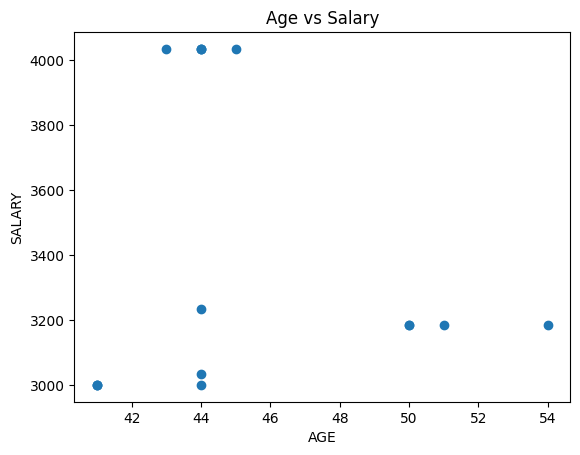

In [82]:
# Plotting age vs salary
plt.scatter(filtered_data['AGE'], filtered_data['SALARY'])
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.title('Age vs Salary')
plt.show()

In [87]:
# Counting people from each place
count_place=df['PLACE'].value_counts()
count_place

PLACE
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

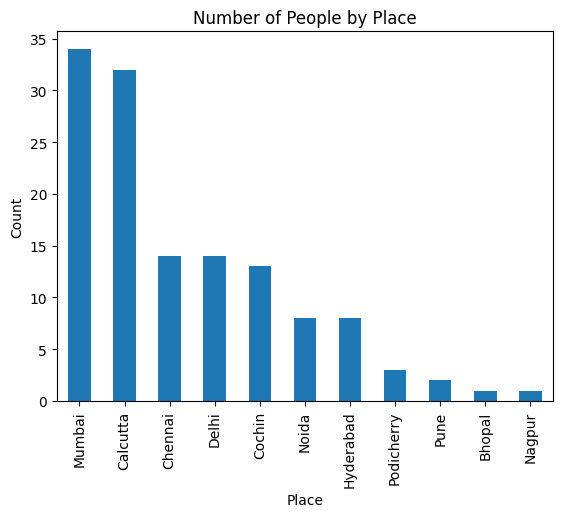

In [90]:
# Visual representation
count_place.plot(kind='bar',title='Number of People by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

<h3  style="color:green;">Data Encoding</h3>

In [95]:
# Example of one-hot encoding for categorical variable 'place'
encoded_df = pd.get_dummies(df, columns=['PLACE','COUNTRY','COMPANY'])
print( encoded_df)

      AGE       SALARY  GENDER   z_score  PLACE_Bhopal  PLACE_Calcutta  \
0    20.0  5283.471074     0.0 -1.462272         False           False   
1    30.0  5283.471074     0.0 -0.247894         False           False   
2    35.0  2300.000000     0.0  0.359295         False            True   
3    40.0  3000.000000     0.0  0.966484         False           False   
4    23.0  4000.000000     0.0 -1.097958         False           False   
..    ...          ...     ...       ...           ...             ...   
142  22.0  8202.000000     0.0 -1.219396         False           False   
143  33.0  9024.000000     0.0  0.116420         False            True   
145  44.0  4034.000000     0.0  1.452236         False           False   
146  33.0  5034.000000     0.0  0.116420         False           False   
147  22.0  8202.000000     0.0 -1.219396         False           False   

     PLACE_Chennai  PLACE_Cochin  PLACE_Delhi  PLACE_Hyderabad  ...  \
0             True         False        

In [101]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())


Original DataFrame:
   COMPANY   AGE       SALARY     PLACE COUNTRY  GENDER   z_score
0      TCS  20.0  5283.471074   Chennai   India     0.0 -1.462272
1  Infosys  30.0  5283.471074    Mumbai   India     0.0 -0.247894
2      TCS  35.0  2300.000000  Calcutta   India     0.0  0.359295
3  Infosys  40.0  3000.000000     Delhi   India     0.0  0.966484
4      TCS  23.0  4000.000000    Mumbai   India     0.0 -1.097958


In [102]:

#One-Hot Encoding
encoded_df = pd.get_dummies(df)  
print("\nEncoded DataFrame with One-Hot Encoding:")
print(encoded_df.head())




Encoded DataFrame with One-Hot Encoding:
    AGE       SALARY  GENDER   z_score  COMPANY_CTS  COMPANY_Congnizant  \
0  20.0  5283.471074     0.0 -1.462272        False               False   
1  30.0  5283.471074     0.0 -0.247894        False               False   
2  35.0  2300.000000     0.0  0.359295        False               False   
3  40.0  3000.000000     0.0  0.966484        False               False   
4  23.0  4000.000000     0.0 -1.097958        False               False   

   COMPANY_Infosys  COMPANY_Infosys Pvt Lmt  COMPANY_TCS  \
0            False                    False         True   
1             True                    False        False   
2            False                    False         True   
3             True                    False        False   
4            False                    False         True   

   COMPANY_Tata Consultancy Services  ...  PLACE_Chennai  PLACE_Cochin  \
0                              False  ...           True         False  

In [104]:
# Label Encoding 
label_encoder = LabelEncoder()
df['place_label_encoded'] = label_encoder.fit_transform(df['PLACE'])
print("\nDataFrame with Label Encoded 'place' Column:")
print(df[['PLACE', 'place_label_encoded']].head())



DataFrame with Label Encoded 'place' Column:
      PLACE  place_label_encoded
0   Chennai                    2
1    Mumbai                    6
2  Calcutta                    1
3     Delhi                    4
4    Mumbai                    6


<h3  style="color:green;">Feature Scaling </h3>

In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_columns = ['AGE', 'SALARY']  # Replace with your encoded numeric columns
numeric_df = df[numeric_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
print(scaled_data)

[[-1.46737581  0.        ]
 [-0.24875897  0.        ]
 [ 0.36054944 -1.26412245]
 [ 0.96985786 -0.96752641]
 [-1.10179076 -0.54381778]
 [ 0.         -0.12010914]
 [ 0.          0.30359949]
 [-1.10179076  0.72730813]
 [ 0.23868776  1.15101676]
 [ 1.57916628  1.57472539]
 [-1.10179076  0.        ]
 [ 0.23868776 -1.77723361]
 [ 1.57916628  0.        ]
 [-1.71109918 -1.71579586]
 [ 0.96985786 -0.96752641]
 [-1.10179076 -0.96752641]
 [-1.10179076 -0.95481515]
 [ 0.23868776 -0.12010914]
 [-1.22365245  0.        ]
 [-0.00503561  0.        ]
 [ 0.60427281 -0.94845952]
 [ 2.1884747  -0.88956402]
 [-1.34551413 -0.19468186]
 [ 0.          0.23368757]
 [ 0.          0.76289965]
 [-1.10179076  1.550574  ]
 [ 0.23868776  1.29719624]
 [ 1.57916628  1.69505864]
 [-1.10179076  1.94589416]
 [ 0.36054944 -1.37682895]
 [ 1.70102797  1.00441357]
 [-1.46737581 -0.99549118]
 [ 1.57916628 -0.52941168]
 [ 0.48241113 -0.10570305]
 [-0.73620571  1.2366059 ]
 [ 0.36054944  1.5848944 ]
 [-0.00503561  0.        ]
 

In [109]:
# MinMaxScaler example
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(numeric_df)
print(scaled_minmax)

[[0.08108108 0.47734962]
 [0.35135135 0.47734962]
 [0.48648649 0.13781723]
 [0.62162162 0.21748037]
 [0.16216216 0.33128485]
 [0.40652222 0.44508934]
 [0.40652222 0.55889382]
 [0.16216216 0.6726983 ]
 [0.45945946 0.78650279]
 [0.75675676 0.90030727]
 [0.16216216 0.47734962]
 [0.45945946 0.        ]
 [0.75675676 0.47734962]
 [0.02702703 0.01650165]
 [0.62162162 0.21748037]
 [0.16216216 0.21748037]
 [0.16216216 0.2208945 ]
 [0.45945946 0.44508934]
 [0.13513514 0.47734962]
 [0.40540541 0.47734962]
 [0.54054054 0.22260157]
 [0.89189189 0.23842039]
 [0.10810811 0.42505975]
 [0.40652222 0.54011608]
 [0.40652222 0.68225788]
 [0.16216216 0.89382042]
 [0.45945946 0.82576534]
 [0.75675676 0.93262775]
 [0.16216216 1.        ]
 [0.48648649 0.10754524]
 [0.78378378 0.74712644]
 [0.08108108 0.20996927]
 [0.75675676 0.33515421]
 [0.51351351 0.44895869]
 [0.24324324 0.80949129]
 [0.48648649 0.90303858]
 [0.40540541 0.47734962]
 [0.48648649 0.47734962]
 [0.45945946 0.13781723]
 [0.64864865 0.21748037]
